Imorting Libraries

In [64]:
import pandas as pd
import os
import tensorflow as tf
from keras.preprocessing.image import ImageDataGenerator
import numpy as np
from keras.preprocessing import image
import matplotlib.pyplot as plt

In [52]:

x=os.walk(r"./data")
x=list(x)
entries={}
it = 0
for i in range(1,len(x)) :

    entries[i]=x[i][0].split("\\")[-1]
    
print(entries)


train_generator, validation_generator = tf.keras.utils.image_dataset_from_directory(
    directory='data/',
    labels='inferred',
    label_mode='categorical',
    batch_size=32,
    image_size=(404, 303),
    shuffle=True,
    seed=123,
    validation_split=0.2,
    subset="both")


{1: 'Acacia', 2: 'Adenanthera microsperma', 3: 'Adenium species', 4: 'Anacardium occidentale', 5: 'Annona squamosa', 6: 'Artocarpus altilis', 7: 'Artocarpus heterophyllus', 8: 'Barringtonia acutangula', 9: 'Cananga odorata', 10: 'Carica papaya', 11: 'Casuarina equisetifolia', 12: 'Cedrus', 13: 'Chrysophyllum cainino', 14: 'Citrus aurantiifolia', 15: 'Citrus grandis', 16: 'Cocos nucifera', 17: 'Dalbergia oliveri', 18: 'Delonix regia', 19: 'Dipterocarpus alatus', 20: 'Erythrina fusca', 21: 'Eucalyptus', 22: 'Ficus microcarpa', 23: 'Ficus racemosa', 24: 'Gmelina arborea Roxb', 25: 'Hevea brasiliensis', 26: 'Hopea', 27: 'Khaya senegalensis', 28: 'Khaya senegalensis A.Juss', 29: 'Lagerstroemia speciosa', 30: 'Magnolia alba', 31: 'Mangifera', 32: 'Melaleuca', 33: 'Melia azedarach', 34: 'Musa', 35: 'Nephelium lappaceum', 36: 'Persea', 37: 'Polyalthia longifolia', 38: 'Prunnus', 39: 'Prunus salicina', 40: 'Psidium guajava', 41: 'Pterocarpus macrocarpus', 42: 'Senna siamea', 43: 'Spondias mombi

In [55]:
def makeHiddenLayers(inputs):
        cnn = tf.keras.layers.Conv2D(16, (3, 3), padding="same",activation="relu")(inputs)
        cnn = tf.keras.layers.BatchNormalization(axis=-1)(cnn)
        cnn = tf.keras.layers.MaxPooling2D(pool_size=(3, 3))(cnn)
        cnn = tf.keras.layers.Dropout(0.25)(cnn)
        cnn = tf.keras.layers.Conv2D(32, (3, 3), padding="same")(cnn)
        cnn = tf.keras.layers.Activation("relu")(cnn)
        cnn = tf.keras.layers.BatchNormalization(axis=-1)(cnn)
        cnn = tf.keras.layers.MaxPooling2D(pool_size=(2, 2))(cnn)
        cnn = tf.keras.layers.Dropout(0.25)(cnn)
        cnn = tf.keras.layers.Conv2D(32, (3, 3), padding="same")(cnn)
        cnn = tf.keras.layers.Activation("relu")(cnn)
        cnn = tf.keras.layers.BatchNormalization(axis=-1)(cnn)
        cnn = tf.keras.layers.MaxPooling2D(pool_size=(2, 2))(cnn)
        cnn = tf.keras.layers.Dropout(0.25)(cnn)
        return cnn
def makeOutputLayer(inputs,class_dict):
    cnn=makeHiddenLayers(inputs)
    cnn = tf.keras.layers.Flatten()(cnn)
    cnn = tf.keras.layers.Dense(128)(cnn)
    cnn = tf.keras.layers.Activation("relu")(cnn)
    cnn = tf.keras.layers.BatchNormalization()(cnn)
    cnn = tf.keras.layers.Dropout(0.5)(cnn)
    cnn = tf.keras.layers.Dense(class_dict)(cnn)
    cnn = tf.keras.layers.Activation("softmax", name="Bark_Output")(cnn)

    return cnn
def assemble(width,height,class_dict):
    inputs = tf.keras.layers.Input(shape=(height, width, 3))
    cnnOutputLayers=makeOutputLayer(inputs,class_dict)
    model=tf.keras.models.Model(inputs=inputs,outputs = [cnnOutputLayers],name="face_net")
    return model


In [57]:
X=assemble(303, 404,50)
X.compile(optimizer = 'adam', loss = 'categorical_crossentropy', metrics = ['accuracy'])
finalModel=X.fit(x = train_generator , validation_data = validation_generator, epochs = 25)

Epoch 1/25
Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: 'arguments' object has no attribute 'posonlyargs'
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert
Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: 'arguments' object has no attribute 'posonlyargs'
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert
140/140 [==============================] - ETA: 0s - loss: 2.9459 - accuracy: 0.2713WARNING:tensorflow:AutoGraph could not transform <function Model.make_test_function.<locals>.test_function at 0x000001C182A6FE58> and will run it as-is.
Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`

In [60]:

test_image = tf.keras.utils.load_img(r'data\Adenanthera microsperma\IMG_5777.JPG', target_size = (404,303))
test_image = tf.keras.utils.img_to_array(test_image)
test_image = np.expand_dims(test_image, axis = 0)
result = X.predict(test_image)
maxIndex=0

for i in range(1,50):
      if result[0][i]>result[0][maxIndex]:
            maxIndex=i
print(entries[maxIndex+1])


1/1 [==============================] - 0s 32ms/step
Adenanthera microsperma


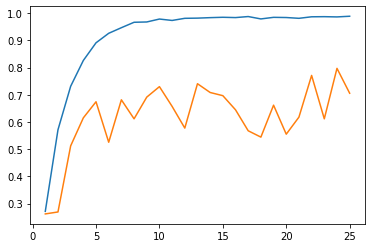

In [74]:
plt.plot(range(1,26),finalModel.history['accuracy'],label="Training Accuracy")
plt.plot(range(1,26),finalModel.history['val_accuracy'],label="Validation Accuracy")

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


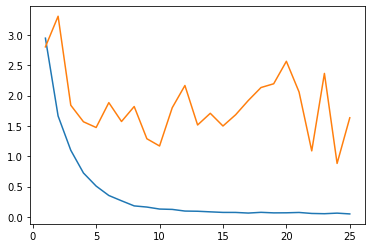

In [77]:
plt.plot(range(1,26),finalModel.history['loss'],label="Training Accuracy")
plt.plot(range(1,26),finalModel.history['val_loss'],label="Validation Accuracy")